<h2> Desafio para RockingData </h2>
<h2> Mateo Rovere </h2>
<br>
El objetivo es evaluar los datos, realizando un análisis descriptivo y evaluar una serie de modelos de clasificación y elegir el que mejor  resultados obtiene prediciendo la columna 21 que representa si se suscribe al servicio correspondiente.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [11]:
df = pd.read_csv('bank-additional-full.csv', sep= ';')
pd.options.display.max_columns = 50
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


([<matplotlib.patches.Wedge at 0x18c20afd550>,
 [Text(-1.0318259710710267, 0.3812284950306482, 'no'),
  Text(1.031825997840915, -0.3812284225757576, 'yes')])

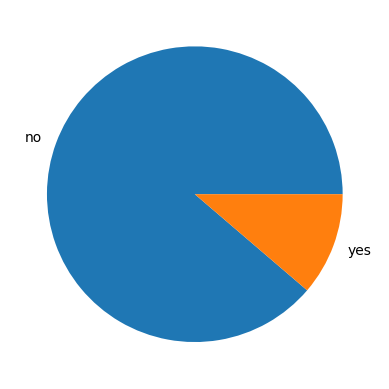

In [14]:
plt.pie(df['y'].value_counts(),labels = df['y'].value_counts().index)

Text(0, 0.5, 'Cantidad de subscripciones positivas')

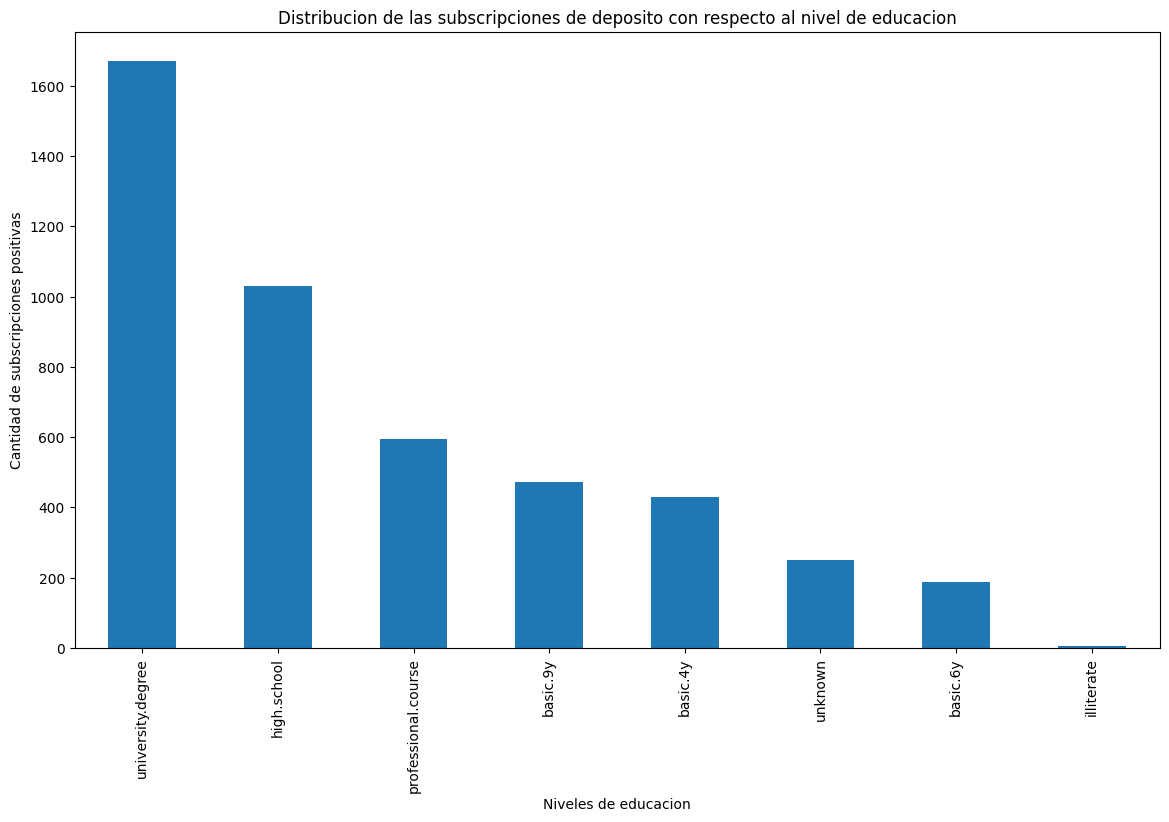

In [15]:
df_yes = df[df['y'] == 'yes']
#plt.bar(df_yes['education'])
ax = df_yes['education'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribucion de las subscripciones de deposito con respecto al nivel de educacion")
ax.set_xlabel("Niveles de educacion")
ax.set_ylabel("Cantidad de subscripciones positivas")

Text(0, 0.5, 'Cantidad de subscripciones positivas')

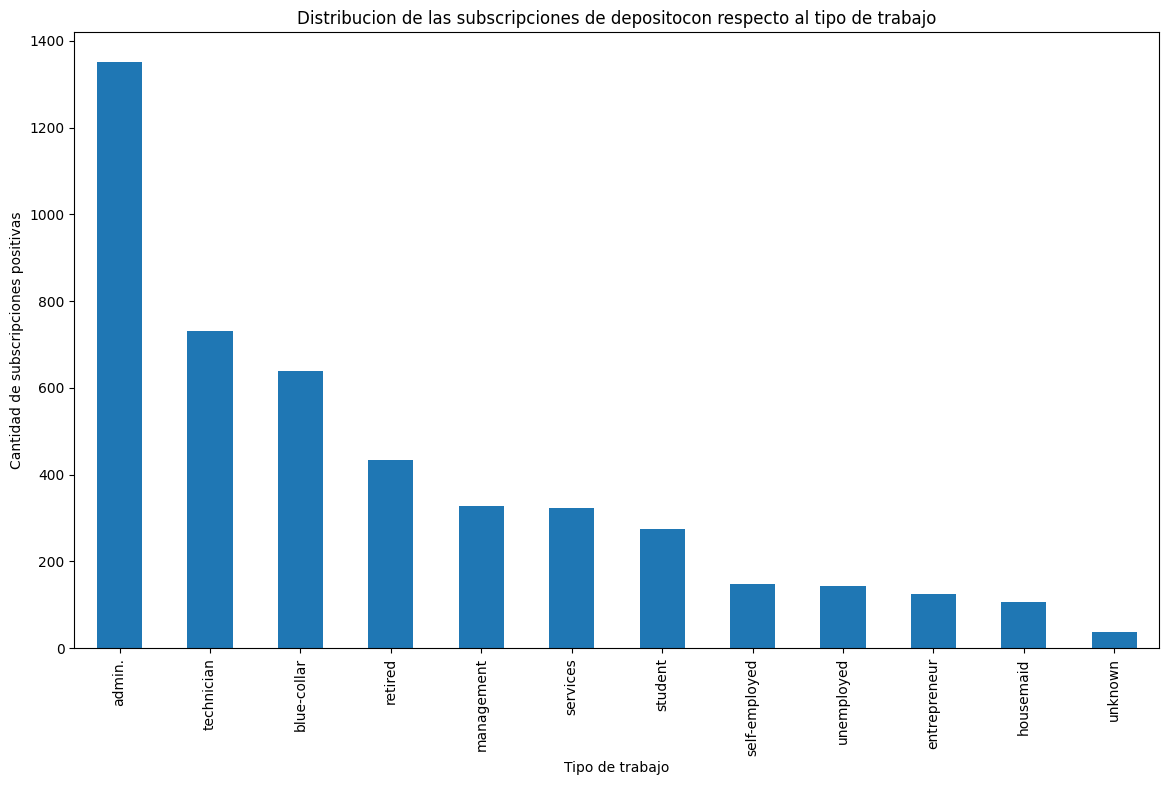

In [16]:
#df_yes = df[df['y'] == 'yes']
ax = df_yes['job'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribucion de las subscripciones de depositocon respecto al tipo de trabajo")
ax.set_xlabel("Tipo de trabajo")
ax.set_ylabel("Cantidad de subscripciones positivas")

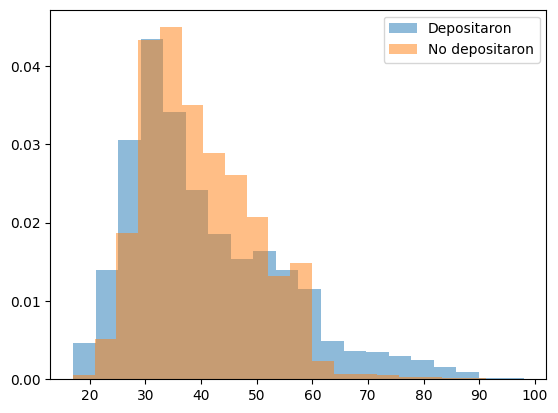

In [45]:
df_no = df[df['y'] == 'no']
plt.hist(df_yes['age'], bins=20, alpha=0.5, density=True, label='Depositaron')
plt.hist(df_no['age'], bins=20, alpha=0.5, density=True, label='No depositaron')
plt.legend(loc='upper right')
plt.show()

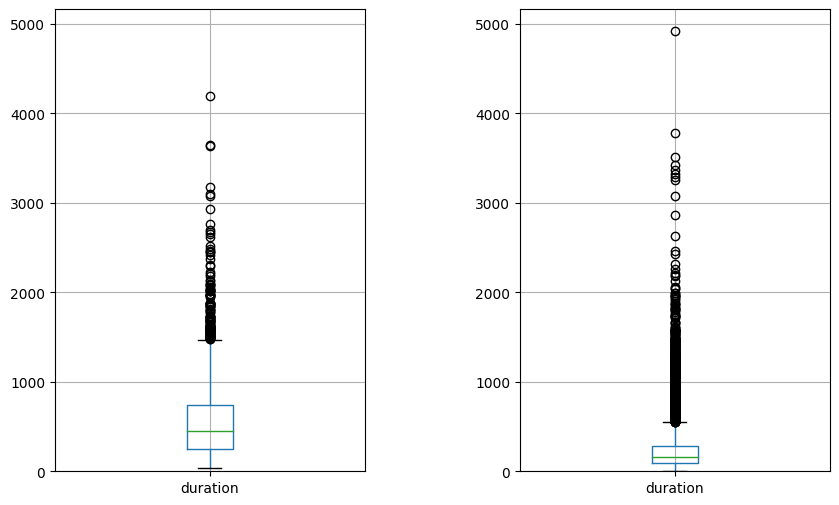

In [48]:
#falta ajustar los ylim
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

df_yes.boxplot('duration', ax=ax[0])
df_no.boxplot('duration', ax=ax[1])

ylim = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])

ax[0].set_ylim(0, ylim)
ax[1].set_ylim(0, ylim)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [19]:
columns_to_one_hot_encode = ['job', 'marital', 'contact','default','housing','loan','poutcome']
df_encoded = pd.get_dummies(df, columns=columns_to_one_hot_encode, prefix=columns_to_one_hot_encode)

educacion =['illiterate','unknown','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']
meses = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
dia_semana = ['mon','tue','wed','thu','fri']

map_edu = {cat: i for i, cat in enumerate(educacion)}
df_encoded['education'] = df_encoded['education'].map(map_edu)

map_mes = {cat: i+3 for i, cat in enumerate(meses)}
df_encoded['month'] = df_encoded['month'].map(map_mes)

map_dia = {cat: i+1 for i, cat in enumerate(dia_semana)}
df_encoded['day_of_week'] = df_encoded['day_of_week'].map(map_dia)

df_encoded['y'] = df_encoded['y'].replace({'yes': 1, 'no': 0})
df_encoded

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,5,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
1,57,5,5,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,37,5,5,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0
3,40,3,5,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
4,56,5,5,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,11,5,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
41184,46,6,11,5,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
41185,56,7,11,5,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
41186,44,6,11,5,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


<h3>Random Forest</h3>

In [60]:

X = df_encoded.loc[:,df_encoded.columns!="y"]
y = df_encoded.loc[:, df_encoded.columns == "y"].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.9101796407185628
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5478
           1       0.64      0.48      0.55       701

    accuracy                           0.91      6179
   macro avg       0.79      0.72      0.75      6179
weighted avg       0.90      0.91      0.90      6179



<h3>Logistic Regresion</h3>

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(report)

Accuracy: 0.9109888331445217
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5478
           1       0.67      0.42      0.52       701

    accuracy                           0.91      6179
   macro avg       0.80      0.70      0.73      6179
weighted avg       0.90      0.91      0.90      6179



<h3>Red Neuronal</h3>

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizar características
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=X_train.shape[1:], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

y_pred_probs = model.predict(X_test)
y_pred_rn = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_rn)
print("Accuracy:", accuracy)

Epoch 1/50
1095/1095 [==============================] - 6s 5ms/step - loss: 0.3052 - accuracy: 0.9076
Epoch 2/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.2159 - accuracy: 0.9097
Epoch 3/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.2067 - accuracy: 0.9112
Epoch 4/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.2029 - accuracy: 0.9113
Epoch 5/50
1095/1095 [==============================] - 5s 5ms/step - loss: 0.1994 - accuracy: 0.9117
Epoch 6/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1971 - accuracy: 0.9117
Epoch 7/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1954 - accuracy: 0.9120
Epoch 8/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1940 - accuracy: 0.9119
Epoch 9/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1935 - accuracy: 0.9127
Epoch 10/50
1095/1095 [==============================] - 5s 4ms/step - loss: 0.191

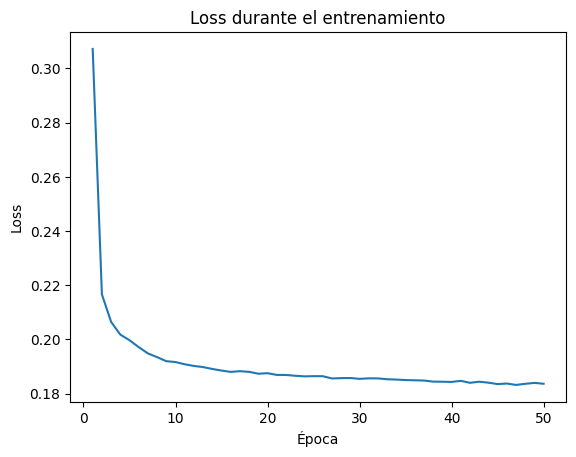

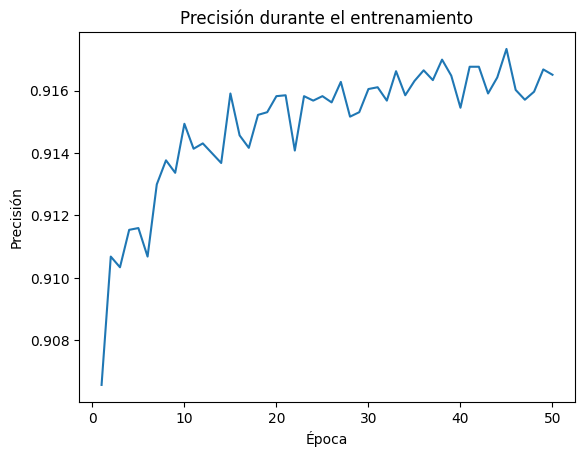

In [43]:
loss = history.history['loss']
accuracy = history.history['accuracy']

plt.plot(range(1, len(loss) + 1), loss)
plt.title('Loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

<h3>SVM</h3>

In [67]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)


Accuracy: 0.8952905000809193


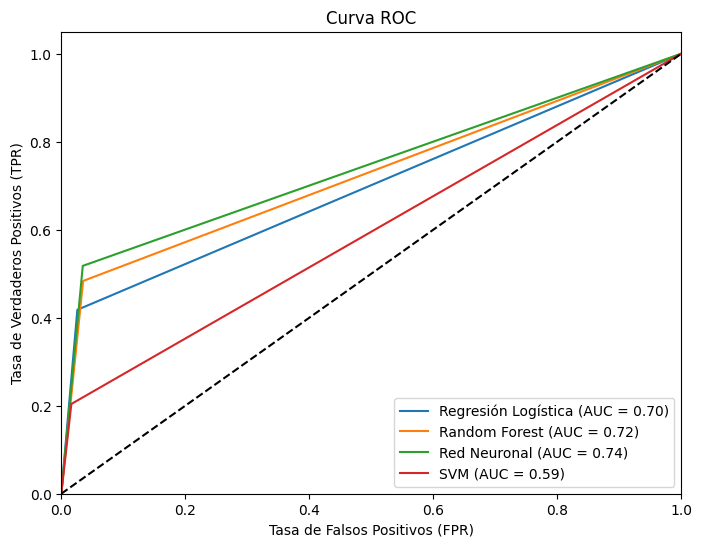

In [68]:

# Calcular la curva ROC y el AUC para cada modelo
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_lr)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_rn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Regresión Logística (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nn, tpr_nn, label='Red Neuronal (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia para un clasificador aleatorio
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()